In [25]:
import time
import numpy as np
import pandas as pd
from numpy.linalg import eig, norm, solve
from scipy.sparse.linalg import spsolve
from scipy.sparse import identity, diags, csr_matrix
from operator import itemgetter

##### Task 1: Solve the exercises 1,4 and 10 of Ref. [1].

- ##### Exercise 1. Suppose the people who own page 3 in the web of Figure 1 are infuriated by the fact that its importance score, computed using formula (1), is lower than the score of page 1. In an attempt to boost page 3’s score, they create a page 5 that links to page 3; page 3 also links to page 5. Does this boost page 3’s score above that of page 1?

\begin{equation}
AX=\lambda X \rightarrow \left ( A-\lambda I_n \right )X=0
\end{equation}

The previous expression translates into solving the following system, where, given that we are interested in the eigenvector corresponding to the eigenvalue of 1, we substract 1 from the diagonal and equate to zero to solve through Gaussian elimination.

\begin{equation}
\left(
\begin{array}{ccccc|c}
-1&0&1/2&1/2&0&0 \\
1/3&-1&0&0&0&0 \\
1/3&1/2&-1&1/2&1&0\\
1/3&1/2&0&-1&0&0\\
0&0&1/2&0&-1&0
\end{array}
\right)
\end{equation}



We first begin with changing of sign the first row and performing the following operations:

\begin{equation}
\left\{\begin{matrix}
R2=R2-\frac{1}{3}R1\\ 
R3=R3-\frac{1}{3}R1\\ 
R4=R4-\frac{1}{3}R1
\end{matrix}\right.
\end{equation}



\begin{equation}
\left(
\begin{array}{ccccc|c}
1&0&-1/2&-1/2&0&0 \\
1/3&-1&0&0&0&0 \\
1/3&1/2&-1&1/2&1&0\\
1/3&1/2&0&-1&0&0\\
0&0&1/2&0&-1&0
\end{array}
\right)
\rightarrow
\left(
\begin{array}{ccccc|c}
-1&0&-1/2&-1/2&0&0 \\
0&-1&1/6&1/6&0&0 \\
0&1/2&-5/6&2/3&1&0\\
0&1/2&1/6&-5/6&0&0\\
0&0&1/2&0&-1&0
\end{array}
\right)
\end{equation}

We now focus on the second column, where changing the second equation of sign and using the second pivot we can reduce the system to:

\begin{equation}
\left\{\begin{matrix}
R3=R3-\frac{1}{2}R2\\ 
R4=R4-\frac{1}{2}R2
\end{matrix}\right.
\end{equation}

\begin{equation}
\left(
\begin{array}{ccccc|c}
-1&0&-1/2&-1/2&0&0 \\
0&1&-1/6&-1/6&0&0 \\
0&0&-3/4&3/4&1&0\\
0&0&1/4&-3/4&0&0\\
0&0&1/2&0&-1&0
\end{array}
\right)
\rightarrow
\left(
\begin{array}{ccccc|c}
-1&0&-1/2&-1/2&0&0 \\
0&1&-1/6&-1/6&0&0 \\
0&0&1&-1&-4/3&0\\
0&0&1/4&-3/4&0&0\\
0&0&1/2&0&-1&0
\end{array}
\right)
\end{equation}

We now focus on the second column, where changing the third equation of sign and using the third pivot we can reduce the system to:

\begin{equation}
\left\{\begin{matrix}
R1=R1+\frac{1}{2}R3\\ 
R2=R2+\frac{1}{6}R3\\
R4=R4-\frac{1}{4}R3\\
R5=R5-\frac{1}{2}R3
\end{matrix}\right.
\end{equation}

\begin{equation}
\left(
\begin{array}{ccccc|c}
-1&0&0&-1&-2/3&0 \\
0&1&0&-1/3&-2/9&0 \\
0&0&1&-1&-4/3&0\\
0&0&0&-1/2&1/3&0\\
0&0&0&1/2&-1/3&0
\end{array}
\right)
\rightarrow
\left(
\begin{array}{ccccc|c}
-1&0&0&-1&-2/3&0 \\
0&1&0&-1/3&-2/9&0 \\
0&0&1&-1&-4/3&0\\
0&0&0&1&-2/3&0\\
0&0&0&1/2&-1/3&0
\end{array}
\right)
\end{equation}

We now focus on the second column, where using the forth pivot we can reduce the system to:

\begin{equation}
\left\{\begin{matrix}
R1=R1+R4\\ 
R2=R2+\frac{1}{3}R4\\
R3=R3+R4\\
R5=R5-\frac{1}{2}R4
\end{matrix}\right.
\end{equation}

\begin{equation}
\left(
\begin{array}{ccccc|c}
-1&0&0&0&-4/3&0 \\
0&1&0&0&-4/9&0 \\
0&0&1&0&-2&0\\
0&0&0&1&-2/3&0\\
0&0&0&0&0&0
\end{array}
\right)
\end{equation}

Now rewritting the equations from the resulting system, we can establish the following equalities

\begin{equation}
\left\{\begin{matrix}
x_1=\frac{4}{3}\\ 
x_2=\frac{4}{9}\\ 
x_3=2\\
x_4=\frac{2}{3}\\  
\end{matrix}\right.
\end{equation}



The corresponding eigenvector is finally obtained by imposing that the norm 1 of the vector of scores is 1, this is:

\begin{equation}
\left \| x \right \|_1=\sum_{i=1}^{n}x_i=1
\end{equation}



This can be done by dividing alla element by the norm 1 of x, obtaining finally the scores as:

\begin{equation}
\frac{x}{\left \| x \right \|_1}=\left\{\begin{matrix}
x_1=\frac{\frac{4}{3}}{5.44}=0.244\\ 
x_2=\frac{\frac{4}{9}}{5.44}=0.081\\ 
x_3=\frac{2}{5.44}=0.367\\
x_4=\frac{\frac{2}{3}}{5.44}=0.122\\  
x_5=\frac{1}{5.44}=0.183
\end{matrix}\right.
\end{equation}

The obtained result can rapidly be verified by solving the linear system ( i.e. the code forstrategy 1 ):

In [7]:
A_1=np.array([[0,0,1.0/2,1.0/2,0],[1.0/3,0,0,0,0],[1.0/3,1.0/2,0,1.0/2,1],
              [1.0/3,1.0/2,0,0,0],[0,0,1.0/2,0,0]])
print A_1

[[ 0.          0.          0.5         0.5         0.        ]
 [ 0.33333333  0.          0.          0.          0.        ]
 [ 0.33333333  0.5         0.          0.5         1.        ]
 [ 0.33333333  0.5         0.          0.          0.        ]
 [ 0.          0.          0.5         0.          0.        ]]


In [266]:
m=1e-3
n=5
B=identity(n)-(1-m)*A_1
e=np.ones(n)
x=spsolve(B,e)
x/sum(x)

array([ 0.24484871,  0.08173462,  0.36722615,  0.12256106,  0.18362946])

As it can be seen the same result hasbeen obtained with only a few iterations.

- ##### Exercise 4. In the web of Figure 1, remove the link from page 3 to page 1. In the resulting web, page 3 is now a dangling node. Set up the corresponding substochastic matrix and find its largest positive (Perron) eigenvalue. Find a nonnegative Perron eigenvector for this eigenvalue, and scale the vector so that its components sum to 1. Does the resulting ranking seem reasonable?

In this case, as mentioned in the problem statement, the largest positive (Perron) eigenvalue has to be found. Thismis, given that the matrix has a dangling node it is not columns stochastic, and the largest eigenvalue has to be found, as it can not be asumed that it will be 1. To do so:

\begin{equation}
det\left ( A-\lambda I_n \right )=0
\end{equation}

\begin{equation}
\left|
\begin{array}{cccc}
-\lambda&0&0&1/2 \\
1/3&-\lambda&0&0\\
1/3&1/2&-\lambda&1/2\\
1/3&1/2&0&-\lambda\\
\end{array}
\right|
=\lambda \left (-\lambda^3 \right) -1/2 \left (-\lambda^2/3 +\lambda/6 \right) =12\lambda^4 -2\lambda^2-\lambda=0
\end{equation}

Where the previous equation has the following roots:

\begin{equation}
\frac{x}{\left \| x \right \|_1}=\left\{
\begin{matrix}
x_1=0\\                                        
x_2=0.56086\\ 
x_3=-0.28068+0.26395j\\ 
x_4=-0.28068-0.26395j
\end{matrix}\right.
\end{equation}

The second eigenvalue, $x_2=0.56086$, is the one with higher magnitude, therefore it is its eigenvector that we are interested in obtaining.

Having reached to this point, the solution could be obtained be Gaussian elimination. Here below the final step having performed several steps of Gaussian elimination is shown. As it can be seen, even though the system has a solution, solving it by Gaussian elimination has lead to the trivial solution. However, knowing that the score vector must add up to 1, it can be seen that the solution can be obtained by assigning a non-zero value to $x_4$, that way, as shown further on we solve for the PR vector:

\begin{equation}
(A|0)=
\left(
\begin{array}{cccc|c}
1&0&0&-\frac{25}{28}&0 \\
0&1&0&-\frac{625}{1176}&0 \\
0&0&1&-\frac{62525}{32928}&0\\
0&0&0&1&0\\
\end{array}
\right)
\rightarrow
\frac{x}{\left \| x \right \|_1}=\left\{\begin{matrix}
x_1=\frac{\frac{25}{28}}{\left \| x \right \|_1}=0.2065\\ 
x_2=\frac{\frac{625}{1176}}{\left \| x \right \|_1}=0.1229\\ 
x_3=\frac{\frac{62525}{32928}}{\left \| x \right \|_1}=0.4392\\
x_4=\frac{1}{\left \| x \right \|_1}=0.2313
\end{matrix}\right.
\end{equation}


The calculations are verified below:

In [9]:
c=1
x=np.array([c*25.0/28,c*625.0/1176,c*62525.0/32928 ,c])
x/sum(x)

array([ 0.20652884,  0.12293383,  0.43922503,  0.2313123 ])

The solution can be verified directly solving the system as follows:

In [10]:
x1=0
x2=0.5608695
x3=-0.28068+0.26395j
x4=-0.28068-0.26395j
x=np.array([x1,x2,x3,x4])

In [11]:
A=np.array([[-x2,0,0,1.0/2],[1.0/3,-x2,0,0],[1.0/3,1.0/2,-x2,1.0/2],
            [1.0/3,1.0/2,0,-x2]])
A

array([[-0.5608695 ,  0.        ,  0.        ,  0.5       ],
       [ 0.33333333, -0.5608695 ,  0.        ,  0.        ],
       [ 0.33333333,  0.5       , -0.5608695 ,  0.5       ],
       [ 0.33333333,  0.5       ,  0.        , -0.5608695 ]])

In [350]:
eigv=solve(A,x)

In [344]:
abs(eigv/sum(eigv))

array([ 0.20669151,  0.12232505,  0.43913074,  0.23185394])

- ##### Exercise 10. Suppose that A is the link matrix for a strongly connected web of n pages (any page can be reached from any other page by following a finite number of links). Show that dim(V1(A)) = 1 as follows. Let (Ak)ij denote the (i,j)-entry of Ak.

- Show that
\begin{equation}
(A^2)_{ij}=\sum_{k=1}^na_{ik}a_{kj}>0
\end{equation}

Note that if page i can be reached from page j in exactly two steps, there must be some k, for which going from i $\rightarrow$ k and then from k $\rightarrow$ j (therefore two steps ) gives a non-zero result, therefore a connection exists, and therefore one of the terms in the sumation must be nonzero.

- Show more generally that $(A^p)_{ij}$ > 0 if and only if page i can be reached from page j in exactly p steps.

Having deduced the statement for reaching a node in two steps, this can be extended to p steps by using the same logic. This is, to reach i from page j in p steps, there must be a combination of p steps out of all possible combinations that is nonzero and therefore enables that node to be reached.

More precisely:
\begin{equation}
(A^p)_{ij}=\sum_{1\leqslant l_1,...,l_{k-1}\leqslant n}^{n} a_{il_1}a_{l_1l_2}...a_{k-1,j}
\end{equation}

- Argue that $(I+A+A^2 +···+A^p)_ij > 0$ if and only if page i can be reached from page j in p or fewer steps

Having shown that for for page i to be reached by page j in p steps, $(A^p)_{ij}>0$ must be satisfied, it also makes sense to state that it can also be reached in a minor amount of steps if for any $A^q$, for $q< p$ the condition is satisfied.


- Explain why $I+A+A^2 +···+A^{n−1}$ is a positive matrix if the web is strongly
connected.

If a web is strongly connected, it means that any node can be reached from any other node in a given number of steps. Therefore for all possible j's to i's, there must be a combination of steps ( therefore some $A^p$ ) through which the final node can be reached, which is to say that there must be a positive term.

- Use the last part (and Exercise 8) to show that $B = \frac{1}{n} (I+A+A^2 +· · ·+A^{n−1})$ is positive and column-stochastic (and hence by Lemma 3, dim(V1(B)) = 1).

A is column stochastic, which can also be expressed as: $1^t A=1^t$, ans therefore expressing B as:

$B = \frac{1}{n} (I+A+A^2 +· · ·+A^{n−1}) = \frac{1}{n} (1^t+...+1^t)=1^t$

It can be seen that B is also columns stochastic.

- Show that if x ∈ V1(A), then x ∈ V1(B). Why does this imply that dim(V1(A))
= 1?

Nowing that $x ∈ V1(A)$, this is $Ax=x$ for some x, then this score vector from the eigenspace for the eigenvalue 1 from a column stochastic matrix A is also contained in B, given that, as it has already been shown, when A is column stochastic B also is column stochastic, hence it will also contain a maximum eigenvalue equal to one, and this eigenspace will have the same dimension, $V_1(A)=V_1(B)$. 


##### Task 2: Implement the three previous algorithms to compute the PR vector. Use them for the examples in [1] to check they work properly.

All algorithms have been implemented taking advantage of the sparsity of the matrices to speed up the computations. The matrices from exercise one are used to test the correctness of the results for all cases.

In all cases, it can be noticed that when the PR vector for the matrix with a a dangling node is obtained, i.e. the third matrix for all strategies in task 2, the result is somewhat deviated from the correct one obtained in task 1. The reason behind this is that here we approximate A with a matrix M, that modifies slightly the matrix, as the elements from the column which elements add up to 0 are divided by n. This effect is irrelevant for large matrices, as n will be very large, thus $\frac{1}{n}\approx 0$, but when the method is implemented on smaller matrices it gives a slightly different result.

- ##### 1. Solving a linear system

The function below solves the system directly and returns the PR vector. This algorithm however becomes computationally very expensive, as it involves inerting B, defined below, to solve for PR. This becomes more clear when larger matrices are used in strategy 3.

In [15]:
def linear_system_solve(n,G,col,m=0.15):
    index,c=np.unique(col,return_counts=True)
    d=np.zeros(n)
    d[np.array(map(int,index))]=1.0/c
    B=identity(n)-(1-m)*G.dot(diags(d))
    e=np.ones(n)
    x=spsolve(B,-e)
    return x/sum(x)

This method is tested hereunder for the matrices used task 1, showing that it is correctly implemented.

In [8]:
n=5
row = np.array([0, 0, 1, 2, 2, 2, 2, 3, 3, 4])
col = np.array([2, 3, 0, 0, 1, 3, 4, 0, 1, 2])
data = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
G=csr_matrix((data, (row, col)), shape=(n, n))
print G.toarray()
linear_system_solve(n,G,m=0.01)

[[ 0.  0.  1.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  1.  0.  1.  1.]
 [ 1.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]]


array([ 0.24440379,  0.08265325,  0.36613802,  0.12356661,  0.18323832])

In [108]:
n=4
row = np.array([0,0, 1, 2, 2, 2, 3, 3])
col = np.array([2,3, 0, 0, 1, 3, 0, 1])
data = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
G=csr_matrix((data, (row, col)), shape=(n, n))
print G.toarray()
linear_system_solve(n,G,m=0.01)

[[ 0.  0.  1.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 1.  1.  0.  0.]]


array([ 0.38586893,  0.12983675,  0.29018838,  0.19410594])

In [94]:
n=4
d=np.zeros(n)
row = np.array([0, 1, 2, 2, 2, 3, 3])
col = np.array([3, 0, 0, 1, 3, 0, 1])
data = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
G=csr_matrix((data, (row, col)), shape=(n, n))
print G.toarray()
linear_system_solve(n,G)

[[ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 1.  1.  0.  0.]]


array([ 0.21923755,  0.17523074,  0.35582792,  0.2497038 ])

- ##### 2. Power method (adapted to PR computation)

Here is the algorithm for the second strategy, this is, the adapted PR computation.
As specifiedin the exercise statement, the algorithm iterates until $\left \| x_{k+1}-x_k \right \|_\infty < tol$, where tol has defined to be as an example 1e-8.

An important detail taken into account for the computation, is that when when the product $ez^tx$ is performed, first $z^tx$ must be multiplied, as the result is a scalar, which can then be multiplied to e. Otherwise firstly a matrix is computed, and then multiplied by a vector instead, which in comparisson is highly inefficient. This fact supposes a massive difference when larger matrices are used, for instance lake the one in task 3.

For the matrices under test, low values of m have been used, given that higher values give a larger deviation of the result for such small matrices.

In [17]:
def power_method(n,G,col,m=0.15,tol=1e-8):
    i=0
    index,c=np.unique(col,return_counts=True)
    d=np.zeros(n)
    d[np.array(map(int,index))]=1.0/c
    A=G.dot(diags(d))
    e=np.ones(n)
    x=np.ones(n)*(1.0/n)
    z=np.ones(n)*(1.0/n)
    z[np.array(map(int,index))]=(m/n)
    while True:
        x_aux=np.array((1-m)*A.dot(x)+np.dot(e,np.dot(z.T,x))).flatten()
        if norm(x_aux-x,np.inf)<tol:
            break
        x=x_aux
        i+=1
    return x

This method is tested hereunder for the matrices used task 1, showing that it is correctly implemented.

In [17]:
n=4
row = np.array([0,0, 1, 2, 2, 2, 3, 3])
col = np.array([2,3, 0, 0, 1, 3, 0, 1])
data = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
G=csr_matrix((data, (row, col)), shape=(n, n))
print "Matrix G used:"
print G.toarray()
print "PR vector:", power_method(n,G,col,m=0.001)

Matrix G used:
[[ 0.  0.  1.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 1.  1.  0.  0.]]
PR vector: [ 0.38697422  0.12911241  0.2903093   0.19360406]


In [16]:
n=5
row = np.array([0, 0, 1, 2, 2, 2, 2, 3, 3, 4])
col = np.array([2, 3, 0, 0, 1, 3, 4, 0, 1, 2])
data = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
G=csr_matrix((data, (row, col)), shape=(n, n))
print "Matrix G used:"
print G.toarray()
print "PR vector:", power_method(n,G,col,m=0.001) 

Matrix G used:
[[ 0.  0.  1.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  1.  0.  1.  1.]
 [ 1.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]]
PR vector: [ 0.24484871  0.08173462  0.36722614  0.12256106  0.18362946]


In [18]:
n=4
row = np.array([0, 1, 2, 2, 2, 3, 3])
col = np.array([3, 0, 0, 1, 3, 0, 1])
data = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
G=csr_matrix((data, (row, col)), shape=(n, n))
print "Matrix G used:"
print G.toarray()
print "PR vector:", power_method(n,G,col,m=0.001)

Matrix G used:
[[ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 1.  1.  0.  0.]]
PR vector: [ 0.21651175  0.16501436  0.37103484  0.24743905]


- ##### 3. Power method without storing the matrices.

Here a function containing the third strategy has been defined. The algorithm provided in "PRnmalgor.pdf" has been strictly followed. In order to do so the set of indices $L_j$ corresponding to pages having a link with page j, and $c_j$ have been computed prior to the iteration loop. This has shown to result in a much higher efficiency and speed than obtaining these values inside the loop. The steps are briefly explained inside the function

In [18]:
def power_method_no_storing(n,row,col,tol=1e-8,m=0.15):
    
    # Here cj and Lj are obtained. Dangling nodes are not
    # taken into account, therefore zeros must be added
    c_tmp = np.asarray((row).groupby(col).size())
    L_tmp = np.asarray((row).groupby(col).groups.values())
    L_tmp2 = itemgetter(*L_tmp)(np.asarray(row))

    # Here the positions where dangling nodes exist are obtained, 
    # and stored in idx_dn
    idx = np.unique(col)
    idx2 = np.arange(idx[-1])
    idx_dn = np.argwhere(np.in1d(idx2, np.intersect1d(idx2,idx))==False)

    # Here the indexes with dangling nodes are added into c as zeros. 
    # NaNs have been added into L,
    # given that the values do not matter, L[j] is not used 
    # in the if statement of the While.
    c = np.insert(c_tmp,(idx_dn.ravel()-np.arange(len(idx_dn))),
        [[0]] * len(idx_dn))
    L = np.insert(L_tmp2,(idx_dn.ravel()-np.arange(len(idx_dn))),
        [[np.nan]] * len(idx_dn))

    xc=np.ones(n)*(1.0/n)
    x=np.zeros(n)
    iters=0

    while(norm(x-xc,np.inf)>tol):
        iters+=1
        xc=x
        x=np.zeros(n)
        for j in range(0,n):
            if c[j]==[0]:
                x = x + xc[j]/n
            else:
                x[L[j]] = x[L[j]] + xc[j]/c[j]
        x = (1-m)*x + m/n
    return iters,x

This method is tested hereunder for the matrices used task 1, showing that it is correctly implemented.

In [13]:
n=4
row = pd.Series([0,0, 1, 2, 2, 2, 3, 3])
col = pd.Series([2,3, 0, 0, 1, 3, 0, 1])
data = pd.Series([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
G=csr_matrix((data, (row, col)), shape=(n, n))
print "Matrix G used:"
print G.toarray()
iters,x = power_method_no_storing(n,row,col,m=1e-2)
print "The amount of iterations is:", iters
print "The vector of scores x is:", x

Matrix G used:
[[ 0.  0.  1.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 1.  1.  0.  0.]]
The amount of iterations is: 1282
The vector of scores x is: [ 0.38586795  0.12983642  0.29018764  0.19410545]


In [31]:
n=5
row = pd.Series([0, 0, 1, 2, 2, 2, 2, 3, 3, 4])
col = pd.Series([2, 3, 0, 0, 1, 3, 4, 0, 1, 2])
data = pd.Series([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
G=csr_matrix((data, (row, col)), shape=(n, n))
print "Matrix G used:"
print G.toarray()
iters,x = power_method_no_storing(n,row,col,m=1e-2)
print "The amount of iterations is:", iters
print "The vector of scores x is:", x

Matrix G used:
[[ 0.  0.  1.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  1.  0.  1.  1.]
 [ 1.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]]
The amount of iterations is: 1276
The vector of scores x is: [ 0.24440313  0.08265303  0.36613703  0.12356628  0.18323783]


In [32]:
n=4
row = pd.Series([0, 1, 2, 2, 2, 3, 3])
col = pd.Series([3, 0, 0, 1, 3, 0, 1])
data = pd.Series([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
G=csr_matrix((data, (row, col)), shape=(n, n))
print "Matrix G used:"
print G.toarray()
iters,x = power_method_no_storing(n,row,col,m=1e-2)
print "The amount of iterations is:", iters
print "The vector of scores x is:", x

Matrix G used:
[[ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 1.  1.  0.  0.]]
The amount of iterations is: 1278
The vector of scores x is: [ 0.21666411  0.16560869  0.37013956  0.24758499]


##### Task 3: Download the le p2p-Gnutella30.mtx from the Sparse Matrix collection [3] Then use the previous methods to compute the PR vector. Report the results obtained. Inves- tigate the role of tol in the computation and the components of the PR vector.

Here the specified matrix is downloaded. The first 54 rows are skipped as they contain no data.

In [20]:
G=pd.read_table("p2p-Gnutella30.mtx",sep=" ",skiprows=54).as_matrix()
row = G[:,0]-1
col = G[:,1]-1
data=np.ones(len(row))
n=int(col[-1]+1)
G=csr_matrix((data, (row, col)), shape=(n, n))

Here the PR vector is computed using the three defined strategies. As it can be seen all algorithm return the same PR vector.

- ##### 1. Solving a linear system

As it can be seen, solving the linear system in strategy 1 results highly inefficient even though sparse matrices are used. The algorithm takes 140 s to calculate the PR vector.

In [21]:
time_start = time.clock()
x = linear_system_solve(n,G,col)
time_elapsed = (time.clock() - time_start)
print "The computational time elapsed is:", time_elapsed
print "The vector of scores x is:", x

The computational time elapsed is: 171.015712
The vector of scores x is: [  1.32691841e-04   4.42088107e-06   6.58669412e-05 ...,   4.42088107e-06
   4.42088107e-06   4.42088107e-06]


- ##### 2. Power method (adapted to PR computation)

This method is clearly the fastest of all. As previously mentioned, performing the products in the right order makes a huge difference in efficiency.

In [22]:
time_start = time.clock()
x = power_method(n,G,col)
time_elapsed = (time.clock() - time_start)
print "The computational time elapsed is:", time_elapsed
print "The vector of scores x is:", x

The computational time elapsed is: 0.112508
The vector of scores x is: [  1.32691886e-04   4.42088114e-06   6.58669215e-05 ...,   4.42088114e-06
   4.42088114e-06   4.42088114e-06]


- ##### 3. Power method without storing the matrices.

The third method as shown is obviously not as fast as the second one, but it presents a clear advantage not requireing to store the matrices, this is, all operationds are performed through $L_j$ and $c_j$. 

In [23]:
G=pd.read_table("p2p-Gnutella30.mtx",sep=" ",skiprows=54)
row = G.ix[:,0]-1
col = G.ix[:,1]-1
n = col.iloc[-1]+1

Here the third strategy is used to obtain the PR vector for a tolerance of $1e^{-8}$. Later on the effect of the tolerance is analysed in more detail. In this case the answer is obtained in 15 s.

In [24]:
time_start = time.clock()
iters,x = power_method_no_storing(n,row,col,m=0.15,tol=1e-8)
time_elapsed = (time.clock() - time_start)
print "The computational time elapsed is:", time_elapsed
print "The amount of iterations is:", iters
print "The vector of scores x is:", x

The computational time elapsed is: 14.929948
The amount of iterations is: 67
The vector of scores x is: [  1.32690167e-04   4.42087525e-06   6.58663903e-05 ...,   4.42087525e-06
   4.42087525e-06   4.42087525e-06]


Here the algorithm is analysed in more detail. The amount of iterations and computational times are displayed further down for a tolerance from $1e^{-1}$ up to $1e^{-13}$.

As it can be noticed, the PR vector converges to a constant value, with a precision of $1e^{-8}·1e^{-6}=1e^{-14}$, which is the amount of decimals displayed on screen for values of the order $e^{-6}$, from the 13th iteration, thus a tolerance of $1e^{-13}$.

It can also be observed that until a $tol=1e^{-6}$ the resulting PR vector does not approach the correct one. The reson behind this is that, for the original chosen x and auxiliary xc vector, where xc is used to check the convergence, the infinity norm $\left \| x_{k+1}-x_k \right \|_\infty$ is:

In [169]:
xc=np.ones(n)*(1.0/n)
x=np.zeros(n)
norm(x-xc,np.inf)

2.7261327081402323e-05

Therefore the tolerance must be higher than $1e^{-6}$ due to the construction of the problem. 

The rate of convergence of the power method depends on the ratio between the two largest eigenvalues, this is $\frac{|\lambda_1|}{|\lambda_2|}$. The rate of convergence of this method hence is linear. This is shown in the following plot, where as it can be seen, the increasment of the time elapsed is linear for increments of the tolerance.

The rate of convergence with strategy 3 has also been analyzed for different tolerances. As expected, the lower the tolerance the higher the amount of iterations to reach the condition, and therefore the higher computational time. The following plot shows the increasment of the computational time in terms of the tolerances under test. A similar behaviour has been observed regarding strategy 2, mantaining the clearly lower computational time to solve for the PR vector. 

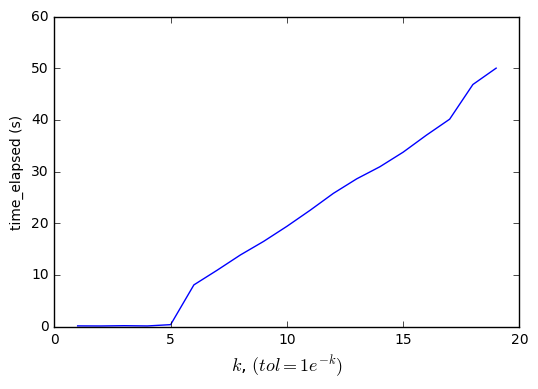

In [192]:
import matplotlib.pyplot as plt
plt.figure()
line1,=plt.plot(k,time_elapsed,'b')
plt.xlabel('$k$, $(tol=1e^{-k})$', fontsize=13)
plt.ylabel('time_elapsed (s)', fontsize=10)
plt.show()

In [186]:
i=0
k=np.arange(1.0,20.0)
tolerance=1*10**(-k)
time_elapsed=np.zeros(len(k))
for tol in tolerance:
    time_start = time.clock()
    iter,x = power_method_no_storing(n,row,col,tol)
    time_elapsed[i] = (time.clock() - time_start)
    print "%d iterations with tol=1e-%d in %.3fs" % (iter,k[i],time_elapsed[i])
    print "PR vector:", x
    print
    i+=1

0 iterations with tol=1e-1 in 0.161s
PR vector: [ 0.  0.  0. ...,  0.  0.  0.]

0 iterations with tol=1e-2 in 0.144s
PR vector: [ 0.  0.  0. ...,  0.  0.  0.]

0 iterations with tol=1e-3 in 0.198s
PR vector: [ 0.  0.  0. ...,  0.  0.  0.]

0 iterations with tol=1e-4 in 0.150s
PR vector: [ 0.  0.  0. ...,  0.  0.  0.]

1 iterations with tol=1e-5 in 0.401s
PR vector: [  4.08919906e-06   4.08919906e-06   4.08919906e-06 ...,   4.08919906e-06
   4.08919906e-06   4.08919906e-06]

39 iterations with tol=1e-6 in 8.098s
PR vector: [  1.32533358e-04   4.42033072e-06   6.58147800e-05 ...,   4.42033072e-06
   4.42033072e-06   4.42033072e-06]

53 iterations with tol=1e-7 in 10.937s
PR vector: [  1.32675553e-04   4.42082451e-06   6.58615806e-05 ...,   4.42082451e-06
   4.42082451e-06   4.42082451e-06]

67 iterations with tol=1e-8 in 13.891s
PR vector: [  1.32690167e-04   4.42087525e-06   6.58663903e-05 ...,   4.42087525e-06
   4.42087525e-06   4.42087525e-06]

81 iterations with tol=1e-9 in 16.518s


- ##### Discuss (no implementation re-quired) which are the possible strategies to deal with a larger webpage network

An important drawback of the power method converges very slowly when the dominat eigenvalues have weak relative separation. However, the power method converges quite fast and gives a very good approximation of the eigenvector corresponding to the largest eigenvalue.

Other alternatives exist for the case when we are dealing with very large matrices. This is the case of the Lanczos Iteration. This method gives at the end of every step a tri-diagonal matrix whose extreme eigenvalues approximatie the extreme eigenvalues of the original matrix. Under suitable initial conditions, the tridiagnoal matrix at the $n^{th}$ step has the same eigenvalues and the eigenvectors of the original matrix.

The clear advantage, is that being the matrix tri-diagonal, the eigendecomposition is easily performed with other method, such as the power method.
It is proved, that as long as $\lambda_1$ is much larger than $\lambda_2$, the Lanczos method converges much faster than the power method.